In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import *
from nltk.tokenize import TweetTokenizer
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#from nltk.corpus import puntk
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
############# ML#######
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
import re, string
from sklearn.ensemble import RandomForestClassifier

In [58]:
New_claim = pd.read_csv('D:/PACCAR/Primary tables/dbo.NewClaims_table.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,18,20,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
New_claim = New_claim[(New_claim.ClmStat == "AP") | (New_claim.ClmStat == "RJ") ]
New_claim.ClmStat.replace(['AP'],0 , inplace= True)
New_claim.ClmStat.replace(['RJ'],1 , inplace= True)
X_train, X_test, y_train, y_test = train_test_split( New_claim.drop(['ClmStat'], axis=1),New_claim.ClmStat, test_size=0.2)

In [60]:
from nltk.stem import SnowballStemmer,WordNetLemmatizer
stemmer=SnowballStemmer('english')
lemma=WordNetLemmatizer()


In [61]:
def clean_review(review_col):
    review_corpus=[]
    stop_words =(stopwords.words('english'))
    stop_words1= set(['for', 'has', 'not', 'to','of','the','is','and','will'])
    stop_words = set(stop_words)
    for i in range(0,len(review_col)):
        review=str(review_col[i])
        review=re.sub('[^a-zA-Z]',' ',review)
        review=re.sub(r"(\S)\ {2,}(\S)(\n?)", r"\1|\2\3", review)
        remove = '|'.join(stop_words1)
        regex = re.compile(r'('+remove+r')', flags=re.IGNORECASE)
        review = regex.sub("", review)
        review=[stemmer.stem(w) for w in word_tokenize(str(review).lower())]
        #review= [PorterStemmer(w) for w in word_tokenize(str(review)]
        review=[w for w in str(review).split() if not w in stop_words]
        review=[lemma.lemmatize(w) for w in word_tokenize(str(review).lower())]
        #review=[w for w in str(review).split() if not w in stop_words]
        review=[w for w in word_tokenize(str(review)) if len(w)>3]
        #review=' '.join( [w for w in review if len(w)>2] )
        review=' '.join(review)
        review_corpus.append(review)
    return review_corpus

In [62]:
X_train['clean_review']=clean_review(X_train[['Complaint','Cause']].values)

In [63]:
X_test['clean_review']=clean_review(X_test[['Complaint','Cause']].values)

In [8]:
#New_claim['clean_review'] = clean_review(New_claim.Complaint.values)

In [64]:
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()
tokenizer = TweetTokenizer()

In [71]:
#n = X_train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,3),tokenizer=tokenize,
               min_df=.08, max_df=0.98, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1,analyzer='word',max_features=50000 )
all_text = pd.concat([X_train.clean_review, X_test.clean_review])

vec.fit(all_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.98, max_features=50000, min_df=0.08,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=1,
        stop_words=None, strip_accents='unicode', sublinear_tf=1,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x000001BF642C8158>, use_idf=1,
        vocabulary=None)

In [66]:
tokens = [t for t in str(X_train.clean_review).split()]
freq = nltk.FreqDist(tokens)

In [118]:
#import operator
#sorted(freq.items(), key=operator.itemgetter(1),reverse=True)
New_claim.dtypes

DivCd                   object
SubmSDt                  int64
DealerCd                object
ClmSeq                   int64
ChassisID               object
PltCd                   object
ModelCd                 object
BuildDt                 object
DlvryDt                 object
CustName                object
ClmStat                  int64
ClmType                 object
TrkQty                   int64
Miles                    int64
RprDt                   object
ApRejDt                 object
RespCd                  object
AssyCd                  object
CmptCd                  object
PartCd                  object
FailCd                  object
CmptBrand               object
FailPN                  object
VendorCd                object
TotProPart             float64
TotProLabor            float64
TotProAmt              float64
Complaint               object
Cause                   object
Corr1                   object
                        ...   
NSRno                   object
XchgRate

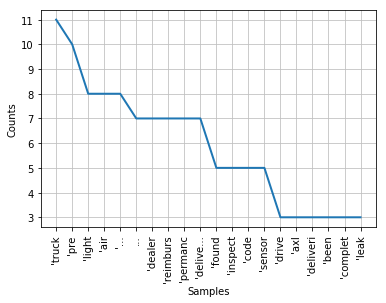

In [69]:
freq.plot(20, cumulative=False)

In [72]:
vec.get_feature_names()

["' air",
 "' air '",
 "' found",
 "' found '",
 "' inspect",
 "' inspect '",
 "' leak",
 "' leak '",
 "' p",
 "' p |",
 "' pre",
 "' pre '",
 "' truck",
 "' truck '",
 'air',
 "air '",
 'check',
 "check '",
 'found',
 "found '",
 'inspect',
 "inspect '",
 'leak',
 "leak '",
 'p',
 'p |',
 'pre',
 "pre '",
 'replac',
 "replac '",
 'truck',
 "truck '",
 '|',
 '| found',
 "| found '",
 '| inspect']

In [73]:
trn_term_doc = vec.transform(X_train.clean_review)

In [74]:
test_term_doc = vec.transform(X_test.clean_review)

In [75]:
trn_term_doc = pd.DataFrame(pd.SparseDataFrame(trn_term_doc))
test_term_doc =pd.DataFrame(pd.SparseDataFrame(test_term_doc))

In [76]:
trn_term_doc[["TrkQty","Miles","TotProAmt","RequestedTotAmt"]]   = X_train[["TrkQty","Miles","TotProAmt","RequestedTotAmt"]]

In [77]:
test_term_doc[["TrkQty","Miles","TotProAmt","RequestedTotAmt"]]   = X_test[["TrkQty","Miles","TotProAmt","RequestedTotAmt"]]

In [ ]:
y_train

In [78]:
trn_term_doc = trn_term_doc.fillna(0)
test_term_doc = test_term_doc.fillna(0)

In [79]:
logreg = LogisticRegression()

In [80]:
logreg.fit(trn_term_doc,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
y_class = logreg.predict(test_term_doc)

In [115]:
prob = logreg.predict_proba(test_term_doc)
preds_class = pd.Series(np.where(logreg.predict_proba(test_term_doc)[:,1] >= .50, 1, 0))


In [85]:
scores = cross_val_score(logreg, trn_term_doc,y_train, scoring='accuracy', n_jobs=-1, cv=5)
print('Cross-validation mean accuracy {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))

Cross-validation mean accuracy 92.06%, std 0.00.


In [ ]:
?confusion_matrix

In [116]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_class).ravel()

In [117]:
tn, fp, fn, tp

(41720, 0, 3662, 0)

In [ ]:
y_test.sum()

In [ ]:
svc = LinearSVC(dual=False)
scores = cross_val_score(svc, trn_term_doc, y_train, scoring='accuracy', n_jobs=-1, cv=5)
print('Cross-validation mean accuracy {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))

In [33]:
rf = RandomForestClassifier(n_estimators=300,max_depth=20,max_leaf_nodes=None, oob_score=True,verbose= True, random_state=123456)
rf.fit(trn_term_doc, y_train)

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   53.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=True, random_state=123456, verbose=True,
            warm_start=False)

In [34]:
predicted = rf.predict_proba(test_term_doc)
predsrf_class = pd.Series(np.where(rf.predict_proba(test_term_doc)[:,1] >= .1, 1, 0))

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.5s finished


In [35]:
tn, fp, fn, tp = confusion_matrix(y_test,predsrf_class).ravel()

In [36]:
tn, fp, fn, tp 

(31855, 9880, 2344, 1303)

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.hist(predicted, normed=True, bins=30)
plt.ylabel('Probability');

In [37]:
pred= np.mean([predicted[:,1], prob[:,1]], axis=0)


In [49]:
pred_ens =pd.Series(np.where(pred>=.2,1,0))

In [50]:
tn, fp, fn, tp = confusion_matrix(y_test,pred_ens).ravel()
tn, fp, fn, tp 

(12785, 28950, 645, 3002)